# Module Six Discussion: Multiple Regression

This notebook contains the step-by-step directions for your Module Six discussion. It is very important to run through the steps in order. Some steps depend on the outputs of earlier steps. Once you have completed the steps in this notebook, be sure to answer the questions about this activity in the discussion for this module.

## Step 1: Generating cars dataset

This block of Python code will generate the sample data for you. You will not be generating the data set using numpy module this week. Instead, the data set will be imported from a CSV file. To make the data unique to you, a random sample of size 30, without replacement, will be drawn from the data in the CSV file. The data set will be saved in a Python dataframe that will be used in later calculations.

In [2]:
import pandas as pd
from IPython.display import display, HTML

# read data from mtcars.csv data set.
cars_df_orig = pd.read_csv("mtcars.csv")

# randomly pick 30 observations from the data set to make the data set unique to you.
cars_df = cars_df_orig.sample(n=30, replace=False)

# print only the first five observations in the dataset.
print("Cars data frame (showing only the first five observations)\n")
display(HTML(cars_df.head().to_html()))

Cars data frame (showing only the first five observations)



,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
21,Dodge Challenger,15.5,8,318.0,150,2.76,3.520,16.87,0,0,3,2
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
24,Pontiac Firebird,19.2,8,400.0,175,3.08,3.845,17.05,0,0,3,2
10,Merc 280C,17.8,6,167.6,123,3.92,3.440,18.90,1,0,4,4


## Step 2: Scatterplot of miles per gallon against weight

The block of code below will create a scatterplot of the variables "miles per gallon" (coded as mpg in the data set) and "weight" of the car (coded as wt).

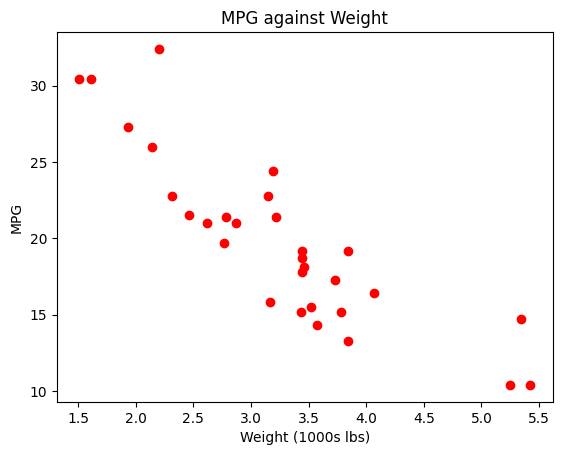

In [3]:
import matplotlib.pyplot as plt

# create scatterplot of variables mpg against wt.
plt.plot(cars_df["wt"], cars_df["mpg"], 'o', color='red')

# set a title for the plot, x-axis, and y-axis.
plt.title('MPG against Weight')
plt.xlabel('Weight (1000s lbs)')
plt.ylabel('MPG')

# show the plot.
plt.show()

## Step 3: Scatterplot of miles per gallon against horsepower

The block of code below will create a scatterplot of the variables "miles per gallon" (coded as mpg in the data set) and "horsepower" of the car (coded as hp).

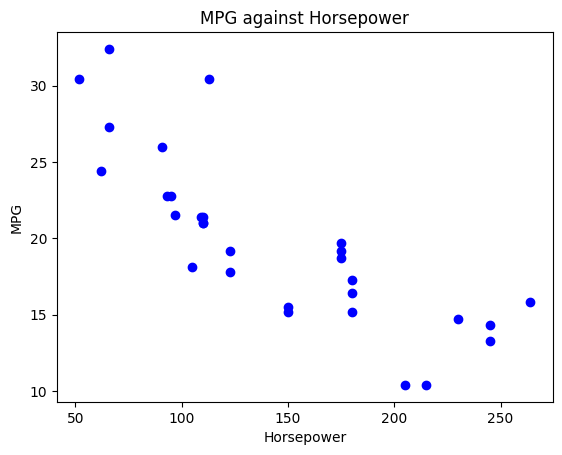

In [7]:
import matplotlib.pyplot as plt

# create scatterplot of variables mpg against hp.
plt.plot(cars_df["hp"], cars_df["mpg"], 'o', color='blue')

# set a title for the plot, x-axis, and y-axis.
plt.title('MPG against Horsepower')
plt.xlabel('Horsepower')
plt.ylabel('MPG')

# show the plot.
plt.show()

## Step 4: Correlation matrix for miles per gallon, weight and horsepower

Now you will calculate the correlation coefficient between the variables "miles per gallon" and "weight". You will also calculate the correlation coefficient between the variables "miles per gallon" and "horsepower". The corr method of a dataframe returns the correlation matrix with the correlation coefficients between all variables in the dataframe. You will specify to only return the matrix for the three variables.

In [5]:
# create correlation matrix for mpg, wt, and hp.

# The correlation coefficient between mpg and wt is contained in the cell for mpg row and wt column (or wt row and mpg column).
wt_corr = cars_df[['mpg','wt']].corr()
print(wt_corr)

# The correlation coefficient between mpg and hp is contained in the cell for mpg row and hp column (or hp row and mpg column).
hp_corr = cars_df[['mpg','hp']].corr()
print(hp_corr)

mpg_wt_corr = cars_df[['mpg','wt','hp']].corr()
print(mpg_wt_corr)

         mpg       wt
mpg  1.00000 -0.86855
wt  -0.86855  1.00000
        mpg      hp
mpg  1.0000 -0.8152
hp  -0.8152  1.0000
         mpg        wt        hp
mpg  1.00000 -0.868550 -0.815200
wt  -0.86855  1.000000  0.707493
hp  -0.81520  0.707493  1.000000


## Step 5: Multiple regression model to predict miles per gallon using weight and horsepower¶

This block of code produces a multiple regression model with "miles per gallon" as the response variable, and "weight" and "horsepower" as predictor variables. The ols method in statsmodels.formula.api submodule returns all statistics for this multiple regression model.

In [6]:
from statsmodels.formula.api import ols

# create the multiple regression model with mpg as the response variable; weight and horsepower as predictor variables.
model = ols('mpg ~ wt+hp', data=cars_df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     68.34
Date:                Sun, 13 Oct 2024   Prob (F-statistic):           2.72e-11
Time:                        15:12:23   Log-Likelihood:                -66.670
No. Observations:                  30   AIC:                             139.3
Df Residuals:                      27   BIC:                             143.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0795      1.519     23.752      0.0

# Multiple Regression Equation

Based on the output, the multiple regression equation is:

* MPG = 36.0795 - 3.3485wt - 0.0377hp

The predicted value of miles per gallon for a car that has 2.78 (2,780 lbs) weight and 225 horsepower:

* MPG = 36.0795 - 3.3485(2.78) - 0.0377(225)





